# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Anggun Sulis Setyawan
- Email: sul191120@gmail.com
- Id Dicoding: sulbae0

## Menentukan Pertanyaan Bisnis

1. Bagaimana trend penggunaan bulanan pada Tahun 2011 - 2012?
2. Kapan rata-rata waktu penggunaan terpadat setiap harinya?

## Menyaipkan semua library yang dibuthkan

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [185]:
daily_dataset_df = pd.read_csv("https://raw.githubusercontent.com/Sulbae/Bike-Sharing-Practice/refs/heads/main/day.csv")
daily_dataset_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [186]:
hourly_dataset_df = pd.read_csv("https://raw.githubusercontent.com/Sulbae/Bike-Sharing-Practice/refs/heads/main/hour.csv")
hourly_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Assessing Data

#### Daily data

In [190]:
daily_dataset_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [191]:
daily_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [192]:
print("Jumlah duplikasi:", daily_dataset_df.duplicated().sum())

Jumlah duplikasi: 0


In [193]:
daily_dataset_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Hourly data

In [194]:
hourly_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [195]:
hourly_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


##### Temuan 
- Terdapat kesalahan tipe data pada kolom:
    - *order_purchase_timestamp*
    - *order_approved_at*
    - *order_delivered_carrier_date*
    - *order_delivered_customer_date*
    - *order_estimated_delivery_date*

In [196]:
hourly_dataset_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

##### Temuan
- Terdapat *missing value/null* pada kolom:
    - *order_approved_at*
    - *order_delivered_carrier_date*
    - *order_delivered_customer_date*

In [197]:
print("Jumlah duplikasi:", hourly_dataset_df.duplicated().sum())

Jumlah duplikasi: 0


### Cleaning Data

#### *__Orders__*

##### Terdapat kesalahan tipe data pada kolom:
- *order_purchase_timestamp*
- *order_approved_at*
- *order_delivered_carrier_date*
- *order_delivered_customer_date*
- *order_estimated_delivery_date*

##### Terdapat null pada kolom:
- order_approved_at
- order_delivered_carrier_date
- order_delivered_customer_date

In [210]:
orders_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [211]:
orders_dataset_df[orders_dataset_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [212]:
orders_dataset_df[orders_dataset_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [213]:
orders_dataset_df[orders_dataset_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


##### Temuan 
- Baris yang memiliki nilai __null__ memiliki berbagai macam nilai pada kolom *order_status*

In [214]:
orders_dataset_df.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

##### Solusi
- Baris data dengan nilai *order_status* selain *delivered* tidak akan digunakan untuk menjawab pertanyaan sehingga lebih baik dihapus baris datanya

In [215]:
outlier_orders = orders_dataset_df["order_status"] != "delivered"
orders_dataset_df.drop(orders_dataset_df[outlier_orders].index, inplace=True)

In [216]:
orders_dataset_df.order_status.value_counts()

order_status
delivered    96478
Name: count, dtype: int64

In [217]:
orders_dataset_df.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

- Hapus semua baris data yang memiliki null karena jumlahnya sedikit tidak akan mempengaruhi hasil analisis secara signifikan

In [218]:
orders_dataset_df.dropna(axis=0,inplace=True)

In [219]:
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96455 non-null  object
 1   customer_id                    96455 non-null  object
 2   order_status                   96455 non-null  object
 3   order_purchase_timestamp       96455 non-null  object
 4   order_approved_at              96455 non-null  object
 5   order_delivered_carrier_date   96455 non-null  object
 6   order_delivered_customer_date  96455 non-null  object
 7   order_estimated_delivery_date  96455 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


#### Selanjutnya
- Mengubah tipe data waktu menjadi datetime

In [220]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
    orders_dataset_df[column] = pd.to_datetime(orders_dataset_df[column])

In [221]:
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


#### *__Order_Items__*

- Terdapat kesalahan tipe data untuk kolom *shipping_limit_date*

In [222]:
order_items_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [223]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
    order_items_dataset_df[column] = pd.to_datetime(order_items_dataset_df[column])

In [224]:
order_items_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### *__Products__*

- Terdapat *missing value/null* pada kolom:
    - *product_category_name*
    - *product_name_lenght*
    - *product_description_lenght*
    - *product_photos_qty*
    - *product_weight_g*
    - *product_lenght_cm*
    - *product_height_cm*
    - *product_width_cm*

In [225]:
products_dataset_df[products_dataset_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [226]:
products_dataset_df.product_category_name.value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

- Baris data yang memiliki null sebaiknya dihapus saja karena dianggap sebagai outlier 

In [227]:
products_dataset_df.dropna(axis=0,inplace=True)

In [228]:
products_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


## Exploratory Data Analysis (EDA)

### Pertanyaan 1:
1. Bagaimana trend penggunaan bulanan pada Tahun 2011 - 2012?


### 1. Explore Data daily_dataset_df

In [229]:
orders_dataset_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96455,96455,96455,96455,96455,96455,96455,96455
unique,96455,96455,1,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-02 00:26:23.673806336,2018-01-02 10:43:03.401710592,2018-01-05 05:53:41.200134656,2018-01-14 13:49:28.328526336,2018-01-25 18:04:03.421284864
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,NaN,NaN,NaN,2017-09-14 09:39:02.500000,2017-09-14 14:42:23,2017-09-18 17:06:18.500000,2017-09-25 22:56:47,2017-10-05 00:00:00
50%,NaN,NaN,NaN,2018-01-20 20:00:12,2018-01-22 13:49:24,2018-01-24 16:28:58,2018-02-02 19:52:30,2018-02-16 00:00:00
75%,NaN,NaN,NaN,2018-05-05 18:53:33,2018-05-06 10:52:57.500000,2018-05-08 14:34:30,2018-05-15 23:09:15.500000,2018-05-28 00:00:00
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [230]:
order_items_dataset_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


- Gabungkan kedua dataset

In [231]:
orders_all_df = pd.merge(
    left=orders_dataset_df,
    right=order_items_dataset_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


- Ubah nama kolom *order_purchase_timestamp* menjadi *transaction_timestamp*

In [232]:
orders_all_df.rename(columns={"order_purchase_timestamp": "transaction_timestamp"}, inplace=True)
orders_all_df

,order_id,customer_id,order_status,transaction_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110168,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
110169,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
110170,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
110171,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [233]:
orders_all_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
transaction_timestamp            0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64

### Pertanyaan 2:
2. Kapan rata-rata waktu penggunaan terpadat setiap harinya?

### 2. Explore Data hourly_dataset_df

In [234]:
products_dataset_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [235]:
orders_all_df.describe(include="all")

,order_id,customer_id,order_status,transaction_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,110173,110173,110173,110173,110173,110173,110173,110173,110173.000000,110173,110173,110173,110173.000000,110173.000000
unique,96455,96455,1,NaN,NaN,NaN,NaN,NaN,NaN,32210,2970,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,NaN,NaN,NaN,NaN,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,21,110173,NaN,NaN,NaN,NaN,NaN,NaN,520,1996,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-02 03:43:50.094551296,2018-01-02 14:14:58.623002368,2018-01-05 10:32:06.834323968,2018-01-14 15:03:12.157534208,2018-01-25 22:59:31.408602880,1.198216,NaN,NaN,2018-01-08 18:12:57.306299904,119.978575,19.949051
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,NaN,NaN,2016-09-19 23:11:33,0.850000,0.000000
25%,NaN,NaN,NaN,2017-09-15 09:15:42,2017-09-15 14:55:25,2017-09-18 22:53:50,2017-09-26 20:32:51,2017-10-06 00:00:00,1.000000,NaN,NaN,2017-09-21 15:10:11,39.900000,13.080000
50%,NaN,NaN,NaN,2018-01-21 10:35:33,2018-01-22 13:57:12,2018-01-24 19:10:03,2018-02-02 21:19:12,2018-02-16 00:00:00,1.000000,NaN,NaN,2018-01-26 20:37:29,74.900000,16.260000
75%,NaN,NaN,NaN,2018-05-05 16:03:59,2018-05-05 22:53:12,2018-05-08 14:20:00,2018-05-15 20:28:25,2018-05-28 00:00:00,1.000000,NaN,NaN,2018-05-10 20:30:37,134.170000,21.150000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


- Gabungkan kedua dataset tersebut

In [236]:
product_orders_df = pd.merge(
    left=orders_all_df,
    right=products_dataset_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
product_orders_df.head()

,order_id,customer_id,order_status,transaction_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [237]:
product_orders_df.describe(include="all")

,order_id,customer_id,order_status,transaction_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,110173,110173,110173,110173,110173,110173,110173,110173,110173.000000,110173,...,110173.000000,110173.000000,108636,108636.000000,108636.000000,108636.000000,108636.000000,108636.000000,108636.000000,108636.000000
unique,96455,96455,1,NaN,NaN,NaN,NaN,NaN,NaN,32210,...,NaN,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,NaN,NaN,NaN,NaN,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,...,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,21,21,110173,NaN,NaN,NaN,NaN,NaN,NaN,520,...,NaN,NaN,10952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-02 03:43:50.094551296,2018-01-02 14:14:58.623002368,2018-01-05 10:32:06.834323968,2018-01-14 15:03:12.157534208,2018-01-25 22:59:31.408602880,1.198216,NaN,...,119.978575,19.949051,NaN,48.808351,787.327175,2.210833,2095.634725,30.198258,16.588102,23.030699
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,NaN,...,0.850000,0.000000,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,NaN,2017-09-15 09:15:42,2017-09-15 14:55:25,2017-09-18 22:53:50,2017-09-26 20:32:51,2017-10-06 00:00:00,1.000000,NaN,...,39.900000,13.080000,NaN,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,NaN,2018-01-21 10:35:33,2018-01-22 13:57:12,2018-01-24 19:10:03,2018-02-02 21:19:12,2018-02-16 00:00:00,1.000000,NaN,...,74.900000,16.260000,NaN,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,NaN,2018-05-05 16:03:59,2018-05-05 22:53:12,2018-05-08 14:20:00,2018-05-15 20:28:25,2018-05-28 00:00:00,1.000000,NaN,...,134.170000,21.150000,NaN,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,21.000000,NaN,...,6735.000000,409.680000,NaN,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [238]:
product_orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
transaction_timestamp               0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1537
product_name_lenght              1537
product_description_lenght       1537
product_photos_qty               1537
product_weight_g                 1537
product_length_cm                1537
product_height_cm                1537
product_width_cm                 1537
dtype: int64

- Terdapat null, anggap sebagai outlier sehingga sebaiknya dihapus

In [239]:
product_orders_df.dropna(axis=0, inplace=True)

In [240]:
product_orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
transaction_timestamp            0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: 
1. Bagaimana trend penggunaan bulanan pada Tahun 2011 - 2012?

In [241]:
monthly_orders_df = orders_all_df.resample(rule="M", on="transaction_timestamp").agg({
    "order_id": "nunique",
    "price": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime("%Y-%m")
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "total_transaction",
    "transaction_timestamp": "time"
}, inplace=True)

monthly_orders_df.groupby(by="time").agg({
    "order_count": "nunique",
    "total_transaction": "sum"
}, inplace=True).sort_values("time", ascending=False)

viz_table_df = monthly_orders_df.loc[(monthly_orders_df["time"] >= "2017-01") & (monthly_orders_df["time"] <= "2017-12")]
viz_table_df

,time,order_count,total_transaction
4,2017-01,748,111712.47
5,2017-02,1641,232638.86
6,2017-03,2546,359198.85
7,2017-04,2303,340669.68
8,2017-05,3545,489159.25
9,2017-06,3135,421923.37
10,2017-07,3872,481604.52
11,2017-08,4193,554699.70
12,2017-09,4149,607220.67
13,2017-10,4478,648247.65


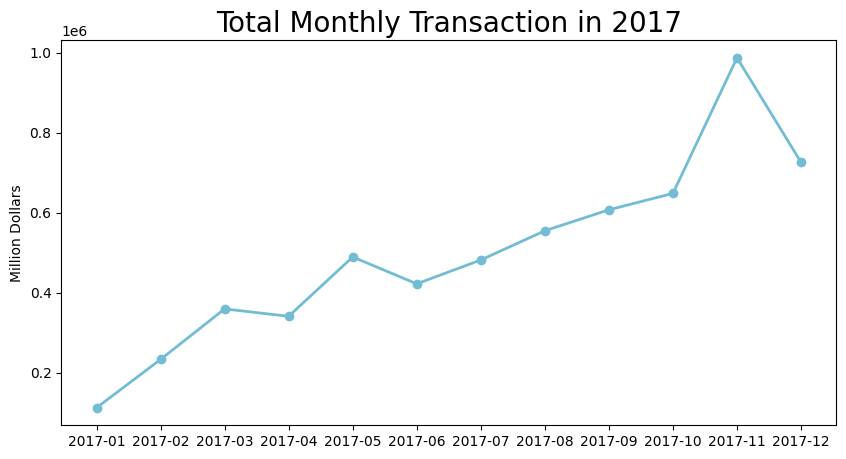

In [242]:
plt.figure(figsize=(10, 5))
plt.plot(
    viz_table_df["time"], 
    viz_table_df["total_transaction"], 
    marker="o",
    linewidth=2,
    color="#72BCD4" 
)
plt.title(
    "Total Monthly Transaction in 2017", 
    loc="center",
    fontsize=20
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel("Million Dollars")
plt.show()

### Pertanyaan 2: 
2. Kapan rata-rata waktu penggunaan terpadat setiap harinya?

- Membuat pivot tabel *product_orders_df*

In [243]:
product_orders_df

,order_id,customer_id,order_status,transaction_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110168,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,174.90,20.10,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0
110169,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,...,205.99,65.02,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0
110170,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
110171,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0


In [244]:
product_orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
transaction_timestamp            0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [245]:
sum_order_items_df = product_orders_df.groupby(by=["product_category_name", "transaction_timestamp"]).order_id.nunique().sort_values(ascending=False).reset_index()
sum_order_items_df.head(10)

,product_category_name,transaction_timestamp,order_id
0,eletrodomesticos,2018-06-01 13:39:44,3
1,eletrodomesticos,2018-03-31 15:08:21,3
2,informatica_acessorios,2018-03-19 20:50:39,2
3,eletrodomesticos,2018-07-22 23:12:02,2
4,cama_mesa_banho,2017-12-06 12:33:21,2
5,telefonia,2017-10-04 19:40:44,2
6,informatica_acessorios,2018-02-13 17:58:15,2
7,cama_mesa_banho,2017-07-23 15:56:36,2
8,relogios_presentes,2018-02-10 17:01:48,2
9,eletrodomesticos,2018-07-21 21:41:25,2


In [246]:
sum_order_items_df["transaction_timestamp"] = sum_order_items_df["transaction_timestamp"].dt.strftime("%Y")

In [247]:
sum_order_items_df.rename(columns={"transaction_timestamp": "year"}, inplace=True)

In [248]:
best_seller_df = sum_order_items_df.groupby(by=["year", "product_category_name"]).order_id.sum().sort_values(ascending=False).reset_index()
best_seller_df.head(10)

,year,product_category_name,order_id
0,2018,beleza_saude,5305
1,2018,cama_mesa_banho,4844
2,2017,cama_mesa_banho,4422
3,2018,esporte_lazer,3973
4,2018,informatica_acessorios,3971
5,2017,esporte_lazer,3537
6,2018,relogios_presentes,3416
7,2018,utilidades_domesticas,3351
8,2017,beleza_saude,3305
9,2018,moveis_decoracao,3147


In [249]:
viz_best_seller_df = best_seller_df.loc[(best_seller_df["year"] > "2016") & (best_seller_df["year"] < "2018")]
viz_best_seller_df

,year,product_category_name,order_id
2,2017,cama_mesa_banho,4422
5,2017,esporte_lazer,3537
8,2017,beleza_saude,3305
10,2017,moveis_decoracao,3107
11,2017,informatica_acessorios,2546
...,...,...,...
156,2017,fashion_roupa_infanto_juvenil,4
157,2017,portateis_casa_forno_e_cafe,3
162,2017,artes_e_artesanato,2
163,2017,seguros_e_servicos,2


In [250]:
viz_best_seller_df.rename(columns={"product_category_name": "category", "order_id": "total_order"}, inplace=True)
viz_best_seller_df

C:\Users\ACER\AppData\Local\Temp\ipykernel_11724\4196852516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viz_best_seller_df.rename(columns={"product_category_name": "category", "order_id": "total_order"}, inplace=True)


,year,category,total_order
2,2017,cama_mesa_banho,4422
5,2017,esporte_lazer,3537
8,2017,beleza_saude,3305
10,2017,moveis_decoracao,3107
11,2017,informatica_acessorios,2546
...,...,...,...
156,2017,fashion_roupa_infanto_juvenil,4
157,2017,portateis_casa_forno_e_cafe,3
162,2017,artes_e_artesanato,2
163,2017,seguros_e_servicos,2


C:\Users\ACER\AppData\Local\Temp\ipykernel_11724\2405188746.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


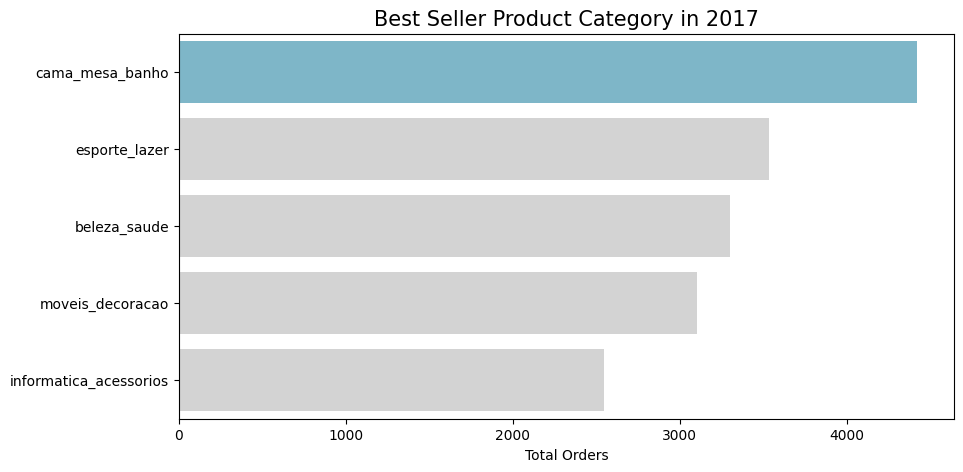

In [251]:
fig, ax = plt.subplots(nrows=1, figsize=(10, 5))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="total_order", 
    y="category", 
    data=viz_best_seller_df.head(5), 
    palette=colors
)

plt.title("Best Seller Product Category in 2017", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Total Orders")
plt.show()

## Conclusion

### Pertanyaan 1
1. Bagaimana trend penggunaan bulanan pada Tahun 2011 - 2012?

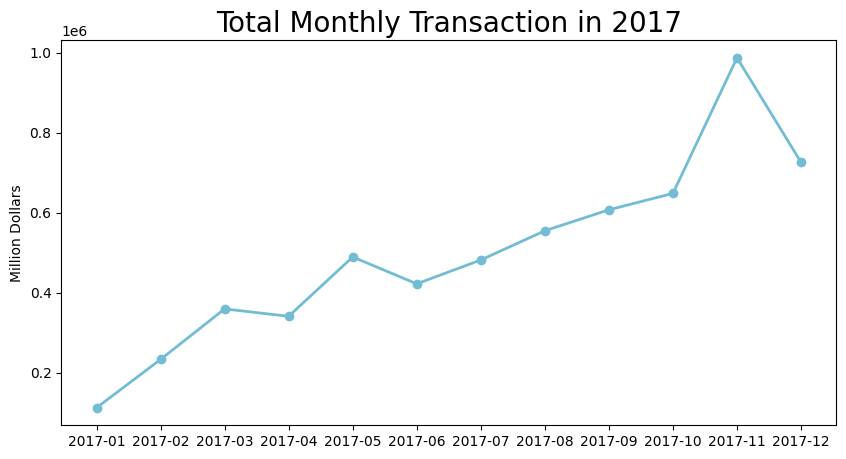

In [252]:
plt.figure(figsize=(10, 5))
plt.plot(
    viz_table_df["time"], 
    viz_table_df["total_transaction"], 
    marker="o",
    linewidth=2,
    color="#72BCD4" 
)
plt.title(
    "Total Monthly Transaction in 2017", 
    loc="center",
    fontsize=20
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel("Million Dollars")
plt.show()

- Secara keseluruhan total nilai transaksaksi dari Januari - Desember 2017 mengalami tren peningkatan.
- Nilai transaksi mengalami peningkatan signifikan hingga 1 juta dolar pada bulan November, tetapi nilainya kembali turun pada bulan Desember.

### Pertanyaan 2
2. Kapan rata-rata waktu penggunaan terpadat setiap harinya?

C:\Users\ACER\AppData\Local\Temp\ipykernel_11724\2405188746.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


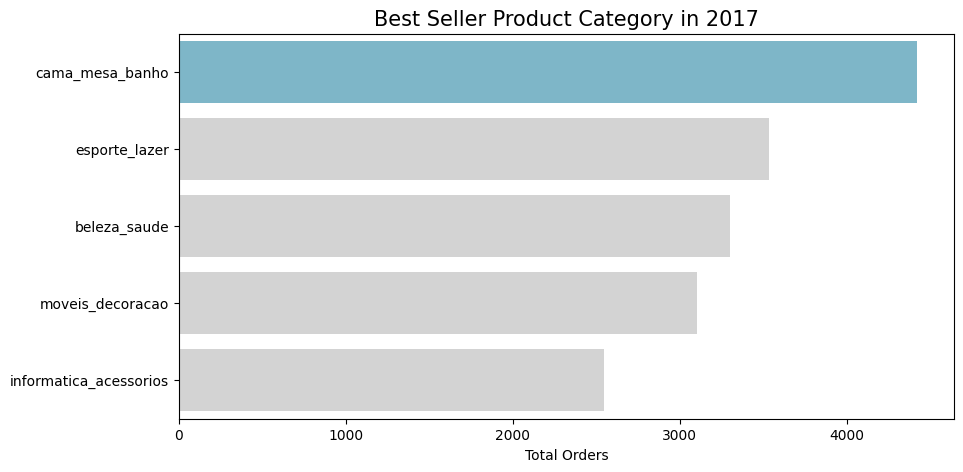

In [253]:
fig, ax = plt.subplots(nrows=1, figsize=(10, 5))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="total_order", 
    y="category", 
    data=viz_best_seller_df.head(5), 
    palette=colors
)

plt.title("Best Seller Product Category in 2017", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Total Orders")
plt.show()

- Top 5 kategori produk yang paling laris dibeli customer pada tahun 2017 adalah:
    1. Cama Mesa Banho
    2. Esporte Lazer
    3. Beleza Saude
    4. Moveis Decaracao
    5. Informatica Acessorios

- Kelima kategori produk tersebut mampu terjual hingga lebih dari 2500 kali. 

In [254]:
product_orders_df = product_orders_df.assign(count_order_id = sum_order_items_df["order_id"], sum_order_id = best_seller_df["order_id"])
product_orders_df.head()

,order_id,customer_id,order_status,transaction_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,count_order_id,sum_order_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3.0,5305.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,3.0,4844.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,2.0,4422.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,2.0,3973.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,2.0,3971.0


In [255]:
product_orders_df.to_csv("all_data.csv", index=False)